In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mne

In [2]:
%matplotlib inline

In [3]:
# Loading data
raw =  mne.io.read_raw_fif("Subject-6_Non-VR.fif", preload=True)
nchan = raw.info['nchan']
raw.info['ch_names']

Opening raw data file C:\Users\sonal\EEG\Subject-6_Non-VR.fif...
Isotrak not found
    Range : 0 ... 23015 =      0.000 ...   179.805 secs
Ready.


<ipython-input-3-7ad6647088e5>:2: RuntimeWarning: This filename (C:\Users\sonal\EEG\Subject-6_Non-VR.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw =  mne.io.read_raw_fif("Subject-6_Non-VR.fif", preload=True)


Reading 0 ... 23015  =      0.000 ...   179.805 secs...


['CH 1', 'CH 3', 'CH 4', 'CH 6', 'CH 7', 'CH 8']

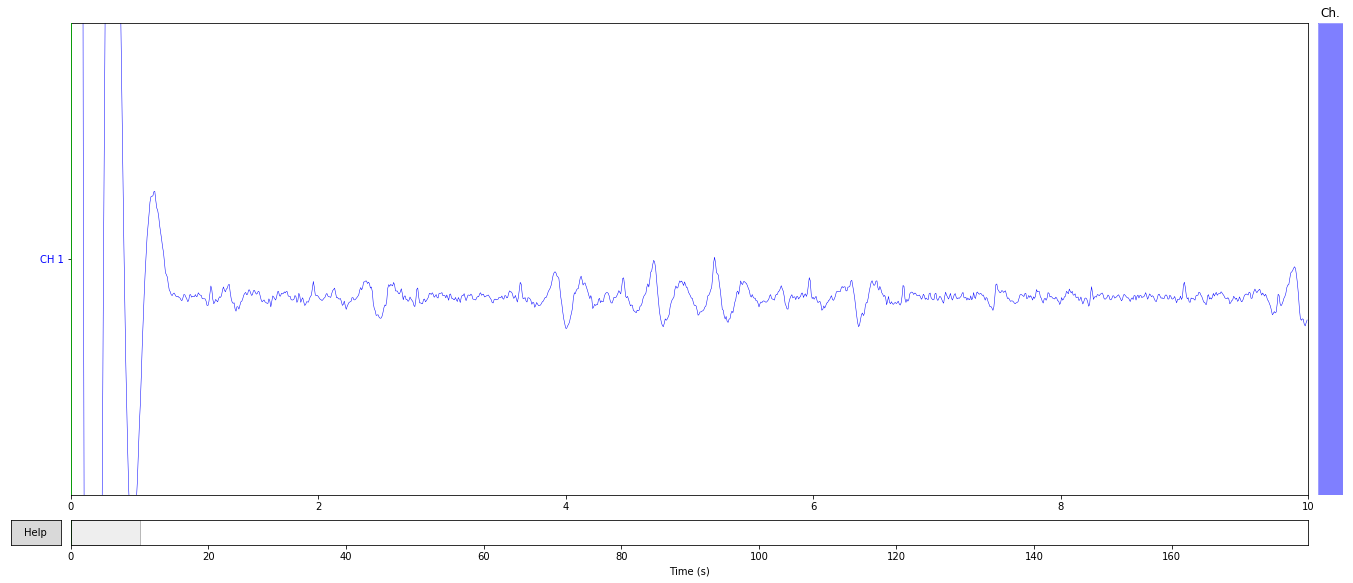

In [4]:
# ploting only one channel
scalings = {'eeg':400,'eeg':400,'eeg':400,'eeg':400,'eeg':400,'eeg':400,'eeg':400,'eeg':400}
color = {'eeg':'blue'}

ch_names = raw.info['ch_names']

raw_pick = raw.pick_channels(["CH 1"])  # getting one channel data | got from https://github.com/mne-tools/mne-python/issues/4699

raw_pick.plot(n_channels=1,scalings=scalings, color=color, title='Data from Channels', show=True, block=True);

In [56]:
# Getting one channel data as dataframe
raw_pick = raw.pick_channels(["CH 1"]) # get single channel
start, stop = raw_pick.time_as_index([10, 175]) # 10 s to 175 s data segment

picks = mne.pick_types(raw_pick.info, eeg=True, exclude=[])
data, times = raw_pick[picks[:], start:stop]

final_df = pd.DataFrame(data=data.T, columns=['Chan'])  # 1st row as the column names
final_df.head()

,Chan
0,-49.223904
1,-45.384220
2,-41.753246
3,-24.812943
4,-15.105989


In [57]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21120 entries, 0 to 21119
Data columns (total 1 columns):
Chan    21120 non-null float64
dtypes: float64(1)
memory usage: 165.1 KB


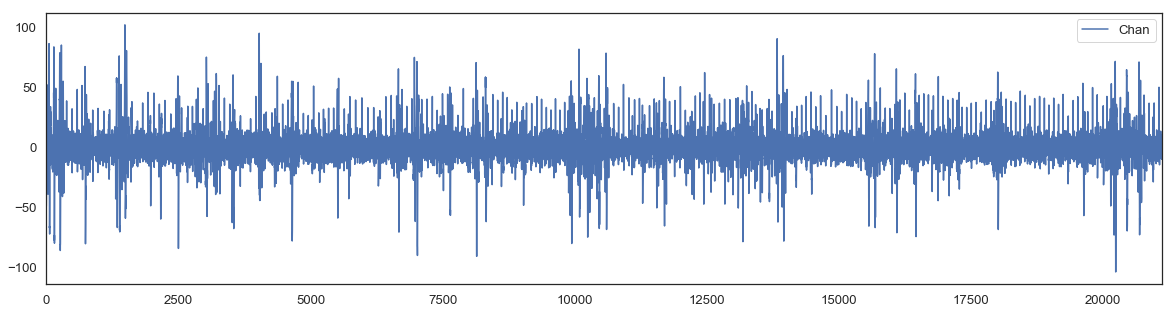

In [58]:
final_df.plot(figsize=(20,5))

In [59]:
# importing modules 
import statistics
from scipy import signal
from scipy.stats import kurtosis
import csv

In [60]:
len(data[0])

21120

### Power Spectral Density

## <div style="color:red"> Not sure, how to choose Sample Frequency and Window length

In [77]:
from scipy import signal
import seaborn as sns

# Define sampling frequency
sf = 100
# Define window length (4 seconds)
win = 4 * sf

freqs, psd = signal.welch(data[0], sf, nperseg=win)

df = pd.DataFrame([freqs,psd])

df = df.T

df.columns = ['Frequency','PSD']

df

,Frequency,PSD
0,0.00,1.373586e-01
1,0.25,9.131348e-02
2,0.50,4.132234e-02
3,0.75,1.557444e-02
4,1.00,1.228295e-03
5,1.25,2.664335e-03
6,1.50,9.804944e-02
7,1.75,1.871894e+00
8,2.00,1.188558e+01
9,2.25,3.602896e+01


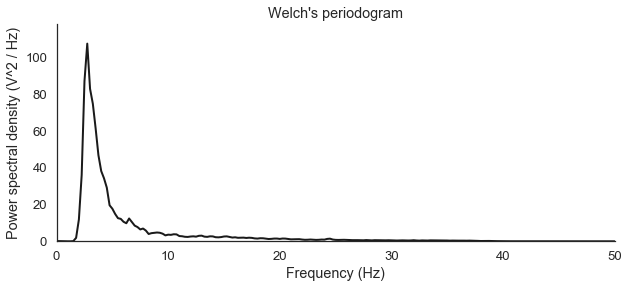

In [78]:
# Plot the power spectrum
sns.set(font_scale=1.2, style='white')
plt.figure(figsize=(10, 4))
plt.plot(freqs, psd, color='k', lw=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (V^2 / Hz)')
plt.ylim([0, psd.max() * 1.1])
plt.title("Welch's periodogram")
plt.xlim([0, freqs.max()])
sns.despine()